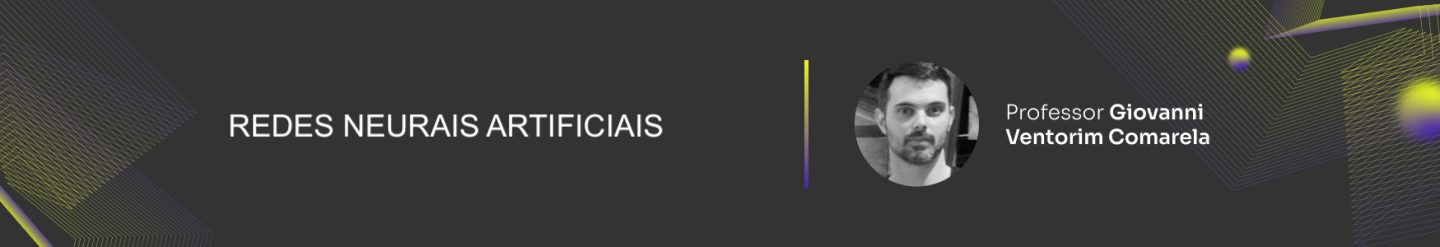

# Perceptron

Um tipo de RNA é baseado em uma unidade chamada *Perceptron*.

Como mencionado na aula passada, o Perceptron foi uma das primeiras tentativas de se modelar/abstrair um neurônio (biológico) artificialmente.

O Perceptron (e variações) será o bloco fundamento para a construção dos modelos complexos que veremos ao longo dessa disciplina.
Sua origem vem dos primórdios dos estudos relacionados a RNAs (McCulloch and Pitts, 1943; Rosenblatt, 1958).

## Definição

- A **entrada** de um Perceptron é um vetor de valores reais
$$\mathbf{x} = \begin{bmatrix} x_1\\ \vdots\\ x_d \end{bmatrix}.$$
- O Perceptron **computa** uma combinação linear desses valores.
- A **saída** do Perceptron é 1 se o resultado da combinação linear for maior que um dado **limiar** e 0 caso contrário.

Em outras palavras, dado o vetor $\mathbf{x}$, a saída de um Perceptron é
$$
o(x_1, \dots, x_d) =
\begin{cases}
1,\text{ se } b + w_1x_1 + w_2x_2 + \dots + w_dx_d > 0 \\
0, \text{ caso contrário}
\end{cases}
$$
onde cada $w_i$ é um valor real **constante**, ou **peso**, que determina a contribuição de $x_i$ para a saída do Perceptron. Note que a quantidade $-b$ (também uma constante real) é o **limiar** que a combinação linear de $\mathbf{x}$ deve ultrapassar para a saída do Perceptron ser 1.

Em notação vetorial, tem-se:
$$
o(\mathbf{x}) =
\begin{cases}
1,\text{ se } \mathbf{w}^T \mathbf{x} + b > 0 \\
0, \text{ caso contrário}.
\end{cases}
$$

**Lembre:** A notação $\mathbf{w}^T$ indica o vetor transposto de $\mathbf{w}$, ou seja, $\mathbf{w}^T = [w_1, \dots, w_d]$.



## Representação

A Figura abaixo é comumente utilizada para representar graficamente um Perceptron.

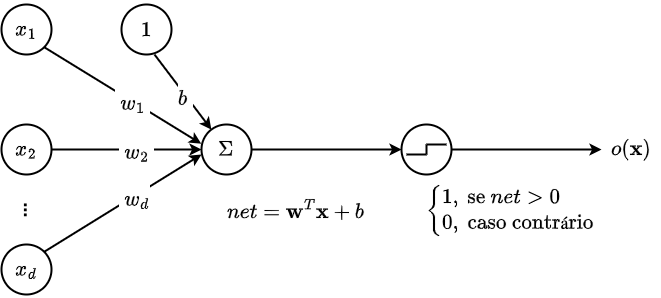

Na Figura, pode-se ver:
1. A **Entrada** do Perceptron, i.e., o vetor $\mathbf{x}$;
2. A **Agregação**, i.e., o cômputo da combinação linear entre $[1, x_1, \dots, x_d]^T$ e $[b, w_1, \dots, w_d]^T$. Na Figura, a agregação é representada pelo nó contendo a letra grega $\Sigma$. Sua saída é representada por $net$.
3. A **Ativação** é o resultado da combinação linear após ser submetido à função **degrau**. Na Figura, essa função é representada pelo nó contendo a representação gráfica de um degrau. A função degrau corresponde a aplicação do limiar.
4. A **Saída** da função degrau, e também do Perceptron, é representada por $o(\mathbf{x})$. Ou seja $$
o(\mathbf{x}) =
\begin{cases}
1,\text{ se } \mathbf{w}^T \mathbf{x} + b > 0 \\
0, \text{ caso contrário}.
\end{cases}
$$


## O Perceptron como um Classificador

Apesar de simples, o Perceptron, como definido acima, pode ser visto como um classificador.

Para mostrar como isso pode ser feito, considere o conjunto de dados apresentado abaixo. O conjunto de dados possui duas características e duas classes.

In [ ]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame([[3.5, 4.25, 1],
     [4, 3, 1],
     [4, 4, 1],
     [4.5, 1.75, 1],
     [4.9, 4.5, 1],
     [5, 4, 1],
     [5.5, 2.5, 1],
     [5.5, 3.5, 1],
     [0.5, 1.5, 0],
     [1, 2.5, 0],
     [1.25, 0.5, 0],
     [1.5, 1.5, 0],
     [2, 2, 0],
     [2.5, 0.75, 0]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,3.50,4.25,1
1,4.00,3.00,1
2,4.00,4.00,1
3,4.50,1.75,1
4,4.90,4.50,1
5,5.00,4.00,1
6,5.50,2.50,1
7,5.50,3.50,1
8,0.50,1.50,0
9,1.00,2.50,0


Os elementos do conjunto de dados e as respectivas classes podem ser visualizados na Figura abaixo.

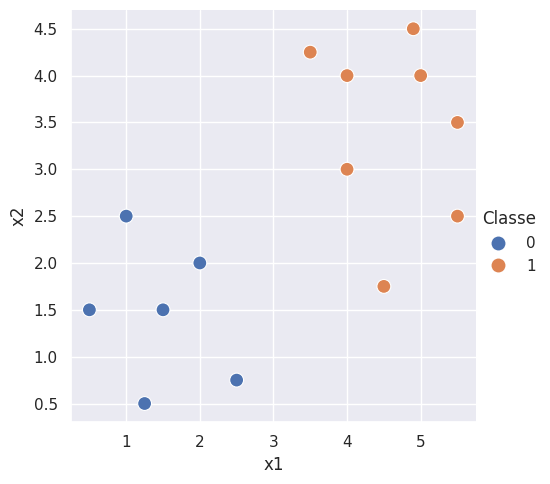

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

Para ilustrar como o Perceptron pode ser utilizado como um classificador, vamos considerar um Perceptron cuja entrada tem duas dimensões.

Nesse sentido, vamos definir os parâmetros do Perceptron da seguinte maneira:
<p align = 'center'>$\mathbf{w} = \begin{bmatrix}2.9\\1.0\end{bmatrix}$ e $b = -10$.</p>

O código abaixo apresenta a definição dos parâmetros $\mathbf{w}$ e $b$ e também da função que faz o cômputo do Perceptron, assim como apresentado acima.

In [ ]:
# Preditor baseado no Perceptron. Tem como entrada:
# - Um vetor x
# - Parâmetros w e b
def perceptron_predict(x, w, b):
  return 1 if np.dot(x, w) + b > 0 else 0

# Definição dos Parâmetros w e b
w = np.array([2.9, 1])
b = -10

Uma pergunta que pode surgir nesse momento é "*De onde vieram esses valores para $\mathbf{w}$ e $b$?*"

Esses valores foram escolhidos apenas a título de exemplo. No caso geral, esses parâmetros são obtidos no processo de treinamento de uma rede neural. Esse processo será abordado em aulas futuras.

Abaixo, o preditor baseado no Perceptron foi utilizado para predizer os rótulos de todos os elementos do conjunto de dados. Os rótulos preditos foram armazenados no ``DataFrame`` original dos dados.

Como pode ser observado no próprio ``DataFrame`` e na Figura que segue, o Perceptron, assim como definido, consegue classificar corretamente todos elementos do conjunto de dados.

In [ ]:
y_pred = [perceptron_predict(x, w, b) for x in df[['x1', 'x2']].values]
df['Classe Predita'] = y_pred
df

,x1,x2,Classe,Classe Predita
0,3.50,4.25,1,1
1,4.00,3.00,1,1
2,4.00,4.00,1,1
3,4.50,1.75,1,1
4,4.90,4.50,1,1
5,5.00,4.00,1,1
6,5.50,2.50,1,1
7,5.50,3.50,1,1
8,0.50,1.50,0,0
9,1.00,2.50,0,0


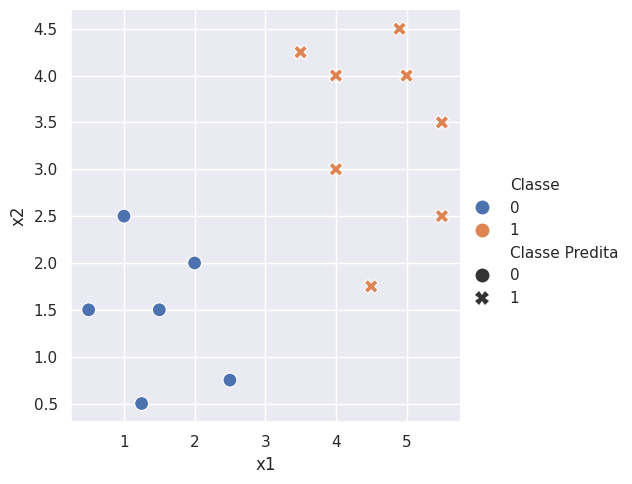

In [ ]:
#@title
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', style = 'Classe Predita', s = 100);

Para visualizar o comportamento do Perceptron definido acima, a Figura a seguir apresenta as regiões de decisão do classificador.

Na Figura, qualquer elemento/ponto que esteja na área ``azul claro`` será classificado como pertencente à ``Classe 0``. Analogamente, pontos na região ``vermelho claro`` serão classificados como ``Classe 1``.

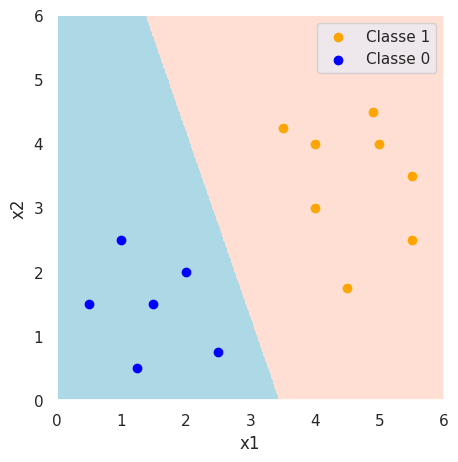

In [ ]:
#@title

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

h = .01
x_min, x_max = 0, 6
y_min, y_max = 0, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 1, figsize=(5, 5))

Z = np.array([perceptron_predict(np.array([x1, x2]), w, b) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'orange', label = 'Classe 1')
axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'blue', label = 'Classe 0')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((0, 6))
plt.ylim((0, 6))
plt.legend(loc = 'best');

Como evidenciado na figura acima, o Perceptron em questão é um classificador linear. Ou seja, as regiões de decisão são delimitadas por uma função linear.

## Limitações do Perceptron

O exemplo acima mostrou que o Perceptron, se utilizado como um classificador, é capaz de tratar bem problemas linearmente separáveis.

Uma pergunta natural, nesse contexto, é "*Um perceptron pode lidar com problemas de classificação arbitrariamente complexos?*"

Infelizmente, a resposta para essa pergunta é **Não**. Na verdade, no fim da década de 60, mostrou-se que, de fato, há até mesmo problemas simples que Perceptrons não são capazes de resolver.

Para ilustrar esse fato, considere o conjunto de dados apresentado abaixo e ilustrado na figura que segue.



In [ ]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame(
    [[2, 1, 1],
     [1, 2, 1],
     [3, 3, 1],
     [-2, -1, 1],
     [-1, -2, 1],
     [-3, -3, 1],
     [2, -1, 0],
     [1, -2, 0],
     [3, -3, 0],
     [-2, 1, 0],
     [-1, 2, 0],
     [-3, 3, 0]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,2,1,1
1,1,2,1
2,3,3,1
3,-2,-1,1
4,-1,-2,1
5,-3,-3,1
6,2,-1,0
7,1,-2,0
8,3,-3,0
9,-2,1,0


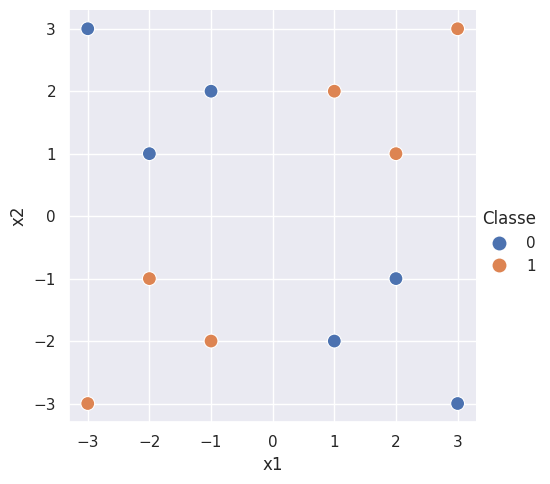

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

Na literatura, o problema dado no conjunto de dados acima é conhecido, informalmente, como XOR (*eXclusive OR* -- OU Exclusivo). Veja que elementos do primeiro e terceiro quadrantes (onde $x_1$ e $x_2$ possuem o mesmo sinal) pertencem à ``Classe 1``. Já os elementos dos quadrantes dois e quatro (onde $x_1$ e $x_2$ possuem sinais opostos) pertencem à ``Classe 0``.

Apesar de ter um padrão claro e simples, para esse conjunto de dados, sabe-se que não é possível discriminar os pontos de acordo com as duas classes utilizando um único Perceptron.

Então, se um Perceptron não consegue lidar com problemas tão simples, surge uma importante pergunta. **Por que um Perceptron é tão importante em Redes Neurais Artificiais?** Na próxima aula, veremos que ao "combinar" vários deles, é possível aproximar bem funções não lineares e tratar problemas de classificação significativamente mais complexos que os linearmente separáveis.

## Funções de Ativação

A versão do Perceptron apresentada no início dessa aula é uma das mais similares ao Perceptron originalmente proposto.

Dependendo do texto e autor, a definição do Perceptron pode variar um pouco.

Comumente, a principal diferença está o último elemento da computação. Ao invés da função degrau, alguns autores podem utilizar outras funções, ou até mesmo definir o Perceptron de uma maneira mais geral.

De fato, muitos autores utilizam o conceito, mas não se referem a ele como Perceptron. Nesse contexto, também é comum ver os termos **neurônio artificial** ou **unidade**.

A Figura abaixo ilustra a generalização.

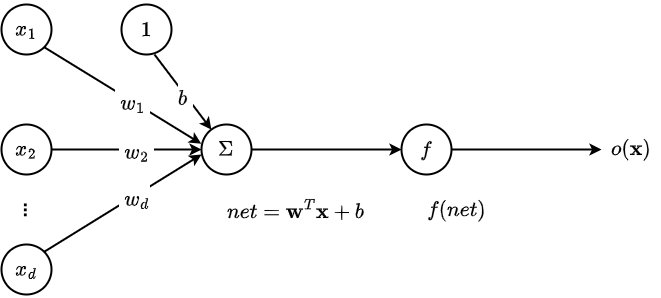

Na Figura acima, ao invés da aplicação da função degrau, é utilizada uma função $f$. Essa função é conhecida como **função de ativação**. A função degrau é apenas um exemplo de função de ativação. Há na literatura várias outras que são comumente utilizadas em Redes Neurais Artificiais.
Algumas delas são apresentadas a seguir e outras serão apresentadas ao longo da disciplina.

Funções de ativação são consideradas **hiperparâmetros** de uma Rede Neural. Em aulas futuras, veremos como a escolha de funções adequadas pode ser realizada.


### Função identidade

Essa função simplesmente retorna o valor obtido após a etapa de combinação linear.

$$f(net) = net.$$

### *Rectified Linear Unit* (ReLU)

Nesse caso, a unidade não produz saída se o resultado da combinação linear for menor que zero. Caso contrário, a função retorna o valor da combinação linear. Em outras palavras:

$$f(net) = \begin{cases}0, \text{ se } net \le 0\\ net,\text{ caso contrário.}\end{cases}$$

Uma outra representação da ReLU é dada por
$$f(net) = \max\{0, net\}.$$

### *Sigmoid*

A função *sigmoid* "compacta" sua entrada de modo que sua saída pertença ao intervalo $[0, 1]$. Assim:

$$f(net) = \frac{1}{1 + e^{-net}}.$$

Veja que quando $net = 0$, tem-se $f(net) = 0,5$. Isso implica que quando $net \le 0$, tem-se $f(net) \le 0,5$ e quando $net > 0$, tem-se $f(net) > 0,5$.

No contexto de Redes Neurais, a função *sigmoid* é comumente denotada por $\sigma(\cdot)$.

### Tangente hiperbólica

Possui um comportamento similar à função *sigmoid*. No entanto, ela "compacta" a entrada de forma a produzir uma saída no intervalo $[-1, 1]$. A função é definida da seguinte forma:

$$f(net) = \frac{e^{2net} - 1}{e^{2net} + 1}.$$

Veja que se $net \le 0$, então $f(net) \le 0$ e que se $net > 0$, então $f(net) > 0$.

### Visualização de diferentes funções de ativação

A seguir, os gráficos de todas as funções de ativação contidas no material desta aula.

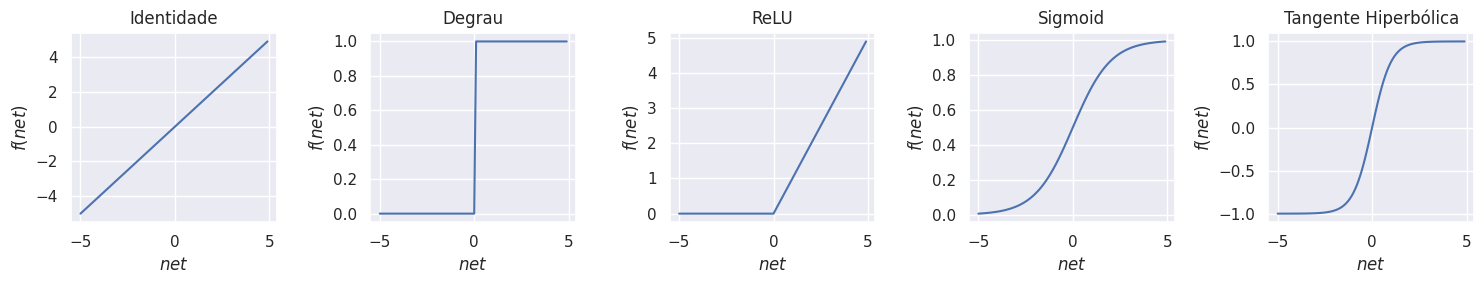

In [ ]:
#@title

x = np.arange(-5, 5, 0.1)

plt.subplots(1, 5, figsize=(15, 3))

plt.subplot(1, 5, 1)
plt.title('Identidade')
plt.plot(x, x)
plt.xlabel(r'$net$')
plt.ylabel(r'$f(net)$')

plt.subplot(1, 5, 2)
plt.title('Degrau')
plt.plot(x, np.where(x > 0, 1, 0))
plt.xlabel(r'$net$')
plt.ylabel(r'$f(net)$')

plt.subplot(1, 5, 3)
plt.title('ReLU')
plt.plot(x, np.maximum(0, x))
plt.xlabel(r'$net$')
plt.ylabel(r'$f(net)$')

plt.subplot(1, 5, 4)
plt.title('Sigmoid')
plt.plot(x, 1 / (1 + np.exp(-x)))
plt.xlabel(r'$net$')
plt.ylabel(r'$f(net)$')

plt.subplot(1, 5, 5)
plt.title('Tangente Hiperbólica')
plt.plot(x, (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1))
plt.xlabel(r'$net$')
plt.ylabel(r'$f(net)$')

plt.tight_layout();

Na próxima aula, veremos como vários Perceptrons (ou Neurônios Artificiais, ou Unidades) e funções de ativação podem ser combinados para tratar problemas não lineares.

## Referências

- Machine Learning, Tom Mitchell, McGraw Hill, 1997.

- McCulloch and Pitts: A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, 1943.

- Rosenblatt: The perceptron - a probabilistic model for information storage and organization in the brain. Psychological Review, 1958.

- Minsky and Papert: Perceptrons: An introduction to computational geometry. MIT Press, 1969.

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020.